## **Brazilian Fintech's Customer Default Analysis | by [Artur Barbosa](https://www.linkedin.com/in/arturpbarbosa/)**

In this case, I'll analyze data I received about customers default owned by a Brazilian fintech. The column named "default" presents two values, which indicates defaulter(default = 1), non-defaulter(default = 0). For now, my job is trying to understand why the customer turns a defaulter based on the behavior of the other data (other columns) we have.


## **1\. Required libs for this task**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **2\. Exploration stage**

For that, I'll also import for this notebook the archive with the data for the analysis. Which is on this [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). It's in CSV format, so let’s see if it has great compatibility:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Above I just used the (.head) to justify the parameter I used for na values. If you check the link, you will see that this CSV file is missing some data, and the “na” strings represent the missing data. So I informed my notebook of these strings, and it converted for NaN values.

And about the content language, which is Portuguese, don't worry; all my graphics and content will be written in English to be easier to read for the majority.

Checking the size of the data and the bulk of defaulters we're analyzing:

In [3]:
df.shape

(10127, 16)

In [4]:
df[df['default'] == 0].shape

(8500, 16)

In [5]:
df[df['default'] == 1].shape

(1627, 16)

In [6]:
total, _ = df.shape
qty_non, _ = df[df['default'] == 0].shape
qty_def, _ = df[df['default'] == 1].shape

In [7]:
print(f"The non-defaulters percentage is {round(100 * qty_non / total, 2)}%")
print(f"The defeaulters percentage is {round(100 * qty_def / total, 2)}%")

The non-defaulters percentage is 83.93%
The defeaulters percentage is 16.07%


So, the code speaks for its selves; We have less than 20% of customers defaulting, which maybe can hamper the graphics comprehension

In [8]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [9]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

### **2.1 Categorical Attributes**

Excluding sex because it's not relevant, and maybe not allowed by Brazilian law named LGPD:

In [10]:
df.drop('sexo', axis=1).select_dtypes('object').describe().transpose()

,count,unique,top,freq
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


### **2.2 Numerical Attributes**

Excluding ID because it's not relevant:

In [11]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **2.3 Looking at variables classes**

Taking a second look at the variables of the data, we can check on the columns "limite_credito" and "valor_transacoes_12m" a little mistake to solve. It's being read as 'object', not 'float' due to the Brazilian way of punctuation in values which involves thousands.

In [12]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Above I'm just confirming if it is just those three columns that are missing data. Below let's check if the missing data has something with default behavior:

In [13]:
def stats_missing_data(df: pd.DataFrame):

  stats_missing_data = []
  for col in df.columns:
    if df[col].isna().any():
      qty, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_missing_data = {col: {'quantity': qty, "percentage": round(100 * qty/total, 2)}}
      stats_missing_data.append(dict_missing_data)

  for stat in stats_missing_data:
    print(stat)

In [14]:
stats_missing_data(df=df)

{'escolaridade': {'quantity': 1519, 'percentage': 15.0}}
{'estado_civil': {'quantity': 749, 'percentage': 7.4}}
{'salario_anual': {'quantity': 1112, 'percentage': 10.98}}


In [15]:
stats_missing_data(df=df[df['default'] == 0])

{'escolaridade': {'quantity': 1263, 'percentage': 14.86}}
{'estado_civil': {'quantity': 620, 'percentage': 7.29}}
{'salario_anual': {'quantity': 925, 'percentage': 10.88}}


In [16]:
stats_missing_data(df=df[df['default'] == 1])

{'escolaridade': {'quantity': 256, 'percentage': 15.73}}
{'estado_civil': {'quantity': 129, 'percentage': 7.93}}
{'salario_anual': {'quantity': 187, 'percentage': 11.49}}


Well, apparently not... 

## **3\. Data Cleaning and Conversion Stage**

So, let's convert those two variables, which are 'objects', but I'll need them in 'float'. For that, I'll use a lambda function:

In [17]:
fn = lambda value: float(value.replace(".", "").replace(",", "."))
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

It's done:

In [18]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Just checking again if "limite_credito" and "valor_transacoes_12m" will be on numerical attributes:

In [19]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


 The last task in this stage will be removing the lines with 'na' values. And make the analysis possible with no troubles or bugs because of missing data:

In [20]:
df.dropna(inplace=True)
df.shape

(7081, 16)

In [21]:
new_total, _ = df.shape
new_qty_non, _ = df[df['default'] == 0].shape
new_qty_def, _ = df[df['default'] == 1].shape

Just validating the featureless impact:

In [22]:
print(f"The non-defaulters percentage is {round(100 * qty_non / total, 2)}%")
print(f"The new non-defaulters percentage is {round(100 * new_qty_non / new_total, 2)}%")
print("")
print(f"The defaulters percentage is {round(100 * qty_def / total, 2)}%")
print(f"The new defaulters percentage is {round(100 * new_qty_def / new_total, 2)}%")

The non-defaulters percentage is 83.93%
The new non-defaulters percentage is 84.28%

The defaulters percentage is 16.07%
The new defaulters percentage is 15.72%


## **4\. Data Visualization Stage**

Well, it's everything set. So let's start to create visualizations to interact the 'default' column, and its variables, with the other columns to conduct data-driven analysis on some reasons why customers turn defaulters:

In [23]:
df_non = df[df['default'] == 0]

In [24]:
df_def = df[df['default'] == 1]

Choosing which seaborn style to work:

In [25]:
sns.set_style("darkgrid")

### **4.1. Categorical Visualization**

* Interacting with the 'escolaridade' column:




/tmp/ipykernel_8937/3227912151.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pic.show()


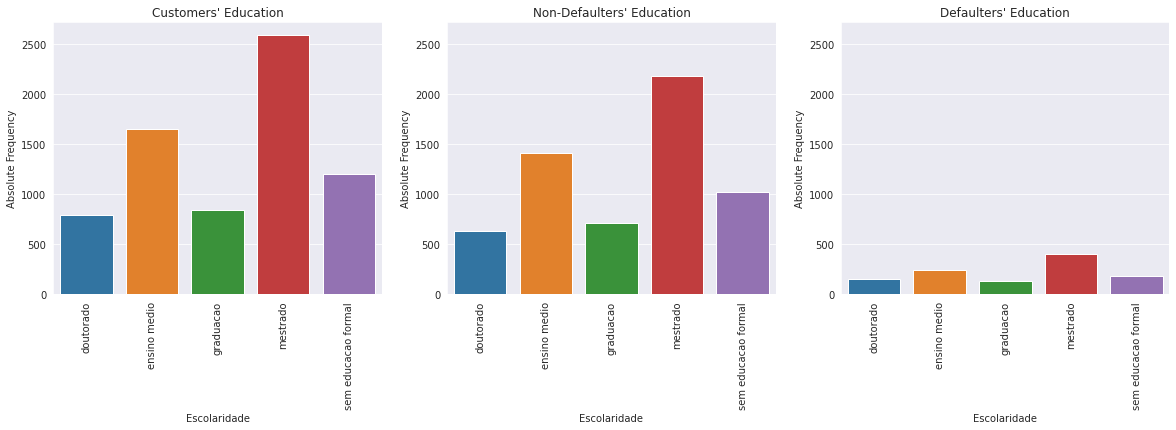

In [26]:
column = 'escolaridade'
titles = ["Customers' Education", "Non-Defaulters' Education", "Defaulters' Education"]

axis = 0
max_y = 0
max = df.select_dtypes('object').describe()[column]['freq'] * 1.1

pic, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_non, df_def]:

  df_to_plot = dataframe[column].value_counts().to_frame()
  df_to_plot.rename(columns={column: 'absolute_frequency'}, inplace=True)
  df_to_plot[column] = df_to_plot.index
  df_to_plot.sort_values(by=[column], inplace=True)
  df_to_plot.sort_values(by=[column])

  f = sns.barplot(x=df_to_plot[column], y=df_to_plot['absolute_frequency'], ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absolute Frequency')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

pic.show()

Not even a slight difference in this case above. The proportion is the same for defaulters and non-defaulters.

* Interacting with the 'salario_anual' column:

/tmp/ipykernel_8937/1869112064.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pic.show()


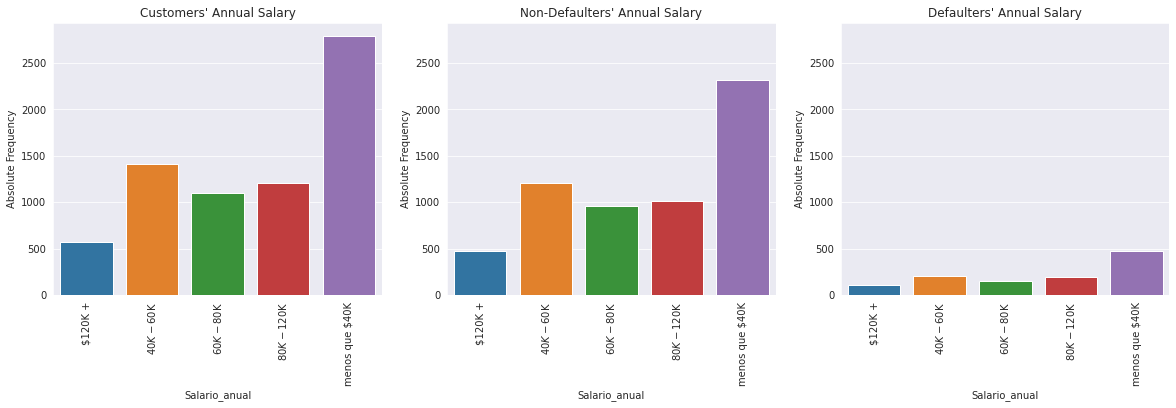

In [27]:
column = 'salario_anual'
titles = ["Customers' Annual Salary", "Non-Defaulters' Annual Salary", "Defaulters' Annual Salary"]

axis = 0
max_y = 0
max = df.select_dtypes('object').describe()[column]['freq'] * 1.1

pic, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_non, df_def]:

  df_to_plot = dataframe[column].value_counts().to_frame()
  df_to_plot.rename(columns={column: 'absolute_frequency'}, inplace=True)
  df_to_plot[column] = df_to_plot.index
  df_to_plot.sort_values(by=[column], inplace=True)
  df_to_plot.sort_values(by=[column])

  f = sns.barplot(x=df_to_plot[column], y=df_to_plot['absolute_frequency'], ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absolute Frequency')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

pic.show()

Not even a slight difference in this case above. The proportion is the same for defaulters and non-defaulters.

* Interacting with the 'tipo_cartao' column:

/tmp/ipykernel_8937/564777835.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pic.show()


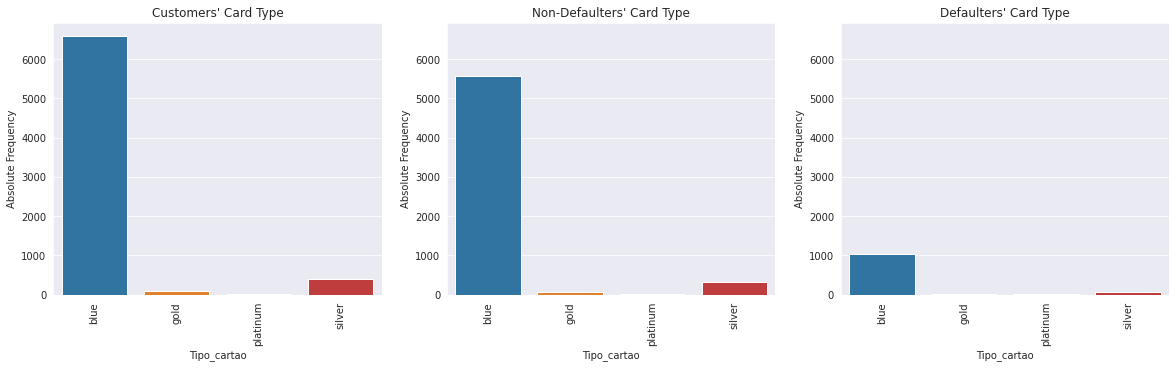

In [28]:
column = 'tipo_cartao'
titles = ["Customers' Card Type", "Non-Defaulters' Card Type", "Defaulters' Card Type"]

axis = 0
max_y = 0
max = df.select_dtypes('object').describe()[column]['freq'] * 1.1

pic, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_non, df_def]:

  df_to_plot = dataframe[column].value_counts().to_frame()
  df_to_plot.rename(columns={column: 'absolute_frequency'}, inplace=True)
  df_to_plot[column] = df_to_plot.index
  df_to_plot.sort_values(by=[column], inplace=True)
  df_to_plot.sort_values(by=[column])

  f = sns.barplot(x=df_to_plot[column], y=df_to_plot['absolute_frequency'], ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absolute Frequency')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

pic.show()

Same behavior between defaulters and non-defaulters above.

/tmp/ipykernel_8937/1234645915.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pic.show()


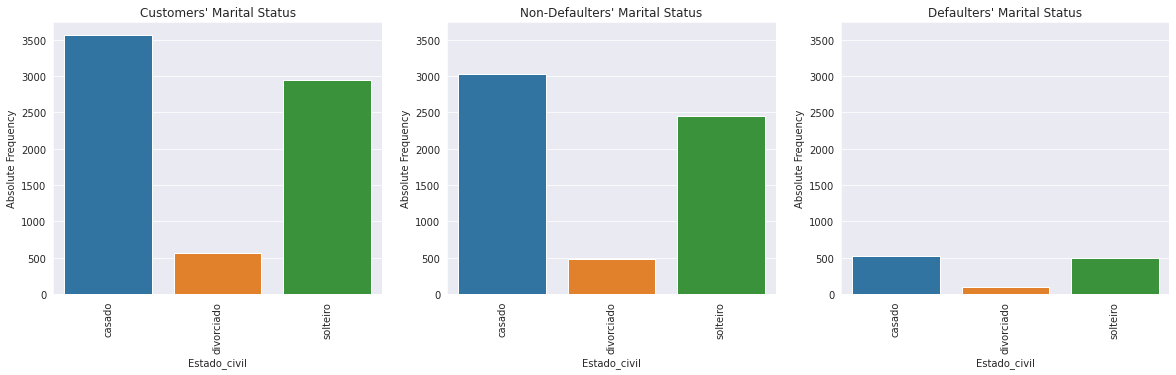

In [29]:
column = 'estado_civil'
titles = ["Customers' Marital Status", "Non-Defaulters' Marital Status", "Defaulters' Marital Status"]

axis = 0
max_y = 0
max = df.select_dtypes('object').describe()[column]['freq'] * 1.1

pic, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_non, df_def]:

  df_to_plot = dataframe[column].value_counts().to_frame()
  df_to_plot.rename(columns={column: 'absolute_frequency'}, inplace=True)
  df_to_plot[column] = df_to_plot.index
  df_to_plot.sort_values(by=[column], inplace=True)
  df_to_plot.sort_values(by=[column])

  f = sns.barplot(x=df_to_plot[column], y=df_to_plot['absolute_frequency'], ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absolute Frequency')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

pic.show()

Above, we can notice a slight difference between 'solteiro' proportion to 'casado' in 'non-defaulters' and 'defaulters' graphics.

### **4.2 Numerical Visualization**

* Interacting with the 'qtd_transacoes_12m' column:

/tmp/ipykernel_8937/3189079734.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pic.show()


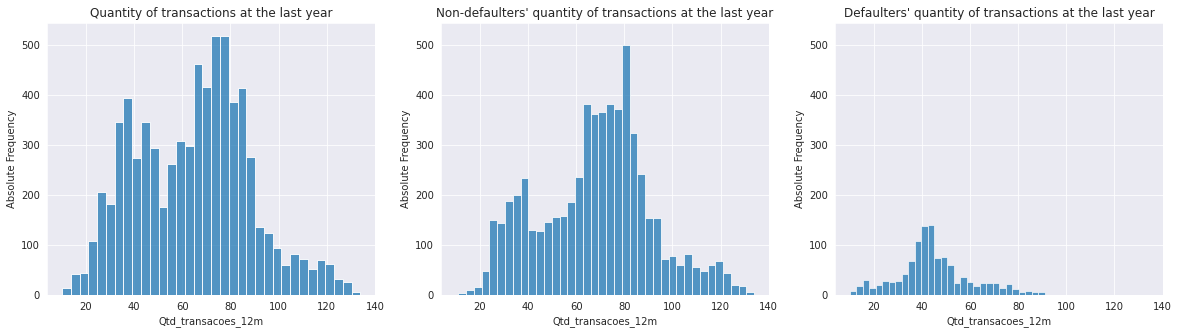

In [30]:
column = 'qtd_transacoes_12m'
titles = ["Quantity of transactions at the last year", "Non-defaulters' quantity of transactions at the last year", "Defaulters' quantity of transactions at the last year"]

axis = 0
max_y = 0
pic, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_non, df_def]:

  f = sns.histplot(x=column, data=dataframe, stat='count', ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absolute Frequency')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

pic.show()

* Interacting with the 'valor_transacoes_12m' column:

/tmp/ipykernel_8937/319928047.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pic.show()


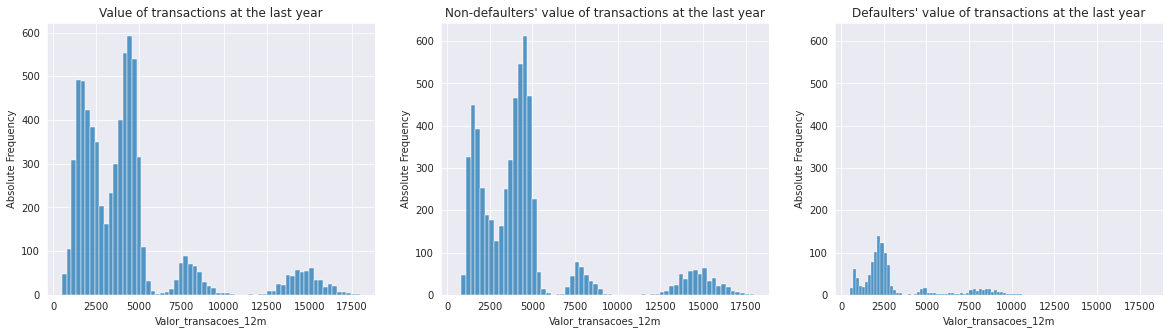

In [31]:
column = 'valor_transacoes_12m'
titles = ["Value of transactions at the last year", "Non-defaulters' value of transactions at the last year", "Defaulters' value of transactions at the last year"]

axis = 0
max_y = 0
pic, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_non, df_def]:

  f = sns.histplot(x=column, data=dataframe, stat='count', ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absolute Frequency')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

pic.show()

Both graphics above starts showing some specific behavior of defaulters. Let's see it in this way: 'valor_transacoes_12m'x'qtd_transacoes_12m'/'default':

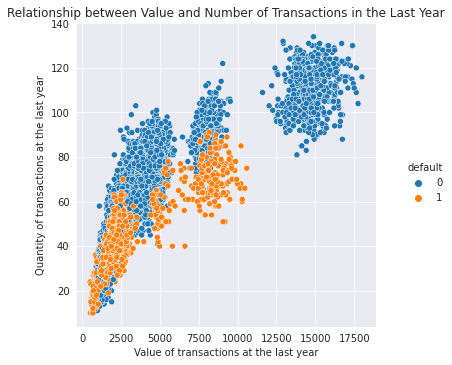

In [32]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relationship between Value and Number of Transactions in the Last Year', 
    xlabel='Value of transactions at the last year', 
    ylabel='Quantity of transactions at the last year'
  )

Ok, now we have a significant difference in behavior between defaulters and non-defaulters.

* Interacting with the 'idade' column:

/tmp/ipykernel_8937/153605427.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pic.show()


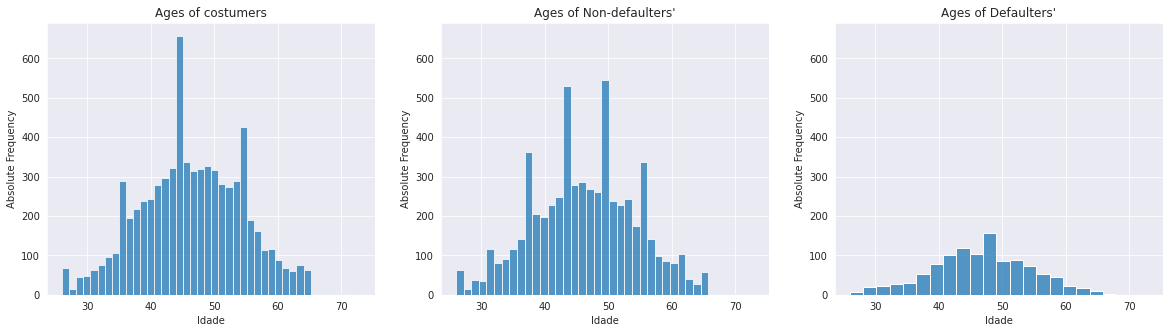

In [33]:
column = 'idade'
titles = ["Ages of costumers", "Ages of Non-defaulters'", "Ages of Defaulters'"]

axis = 0
max_y = 0
pic, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_non, df_def]:

  f = sns.histplot(x=column, data=dataframe, stat='count', ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absolute Frequency')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

pic.show()

* Interacting with the 'qtd_produtos' column:

/tmp/ipykernel_8937/1231133925.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pic.show()


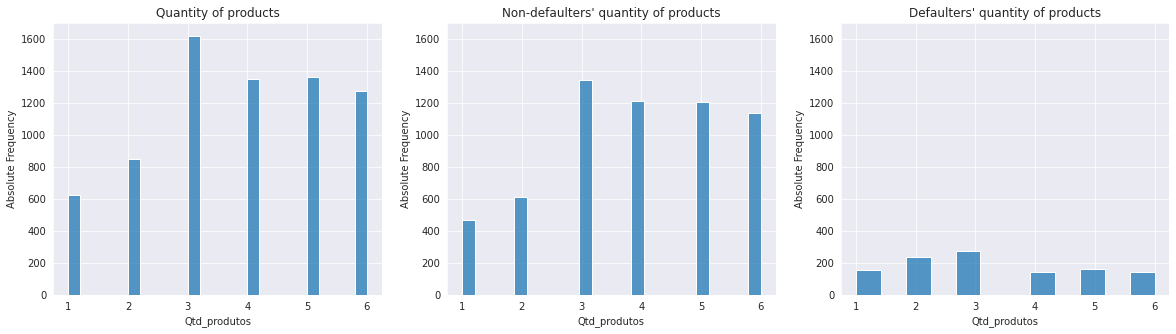

In [34]:
column = 'qtd_produtos'
titles = ["Quantity of products", "Non-defaulters' quantity of products", "Defaulters' quantity of products"]

axis = 0
max_y = 0
pic, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_non, df_def]:

  f = sns.histplot(x=column, data=dataframe, stat='count', ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absolute Frequency')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

pic.show()

* Interacting with the 'iteracoes_12m' column:

/tmp/ipykernel_8937/3335818681.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pic.show()


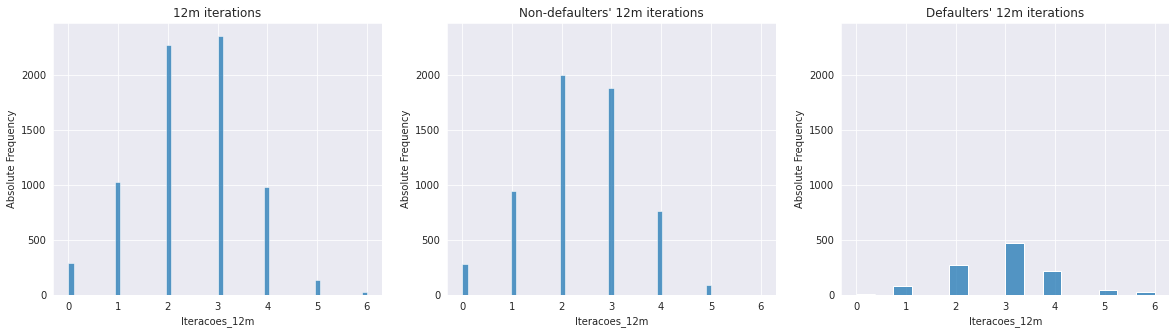

In [35]:
column = 'iteracoes_12m'
titles = ["12m iterations", "Non-defaulters' 12m iterations", "Defaulters' 12m iterations"]

axis = 0
max_y = 0
pic, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_non, df_def]:

  f = sns.histplot(x=column, data=dataframe, stat='count', ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absolute Frequency')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

pic.show()

## **5\. Analysis Digest**

As we could see in the categorical visualizations, no graphics show some particular expressive behavior of defaulters. But, looking into numerical visualizations, some data stands out when we are looking into the visualization which shows 'Relationship between Value and Number of Transactions in the Last Year". It shows that defaulters have a large group that transacts around 80-20 times per year instead of non-defaulters having a pattern of 120-80 times per year. And when looking into the values per year, defaulters have the majority doing around 2500, and some expressive cases around 10000-7500. Instead, non-defaulters have vast data with values around 17500-12500.

Moreover, we could also notice other two slight defaulters patterns. When looking into the 'Quantity of products', most defaulters used to contract around 3-1 products, and non-defaulters used to 3-6. Looking at the '12m iterations', most of the defaulters used to interact 3+ times. Instead of non-defaulters majority used to interact 2 times.

For those who have come this far, I would like to thank you very much, and if you have any comments, suggestions, etc., please get in touch by my [LinkedIn](https://www.linkedin.com/in/arturpbarbosa/).